**Thông tin nhóm**

**STT: 3**

**Tên nhóm: The Matrix**

Nhóm sẽ phân tích để có được các thông tin hữu ích từ dữ liệu: [UK Car Accidents 2005-2015](https://www.kaggle.com/silicon99/dft-accident-data).

# **DOWNLOAD DATA**

In [ ]:
!gdown --id 1V3ku2QgBsqPnkTAtNNNaL6qHScAQ7nte
!unzip archive.zip && rm archive.zip

Downloading...
From: https://drive.google.com/uc?id=1V3ku2QgBsqPnkTAtNNNaL6qHScAQ7nte
To: /content/archive.zip
117MB [00:01, 74.2MB/s]
Archive:  archive.zip
  inflating: Accidents0515.csv       
  inflating: Casualties0515.csv      
  inflating: Vehicles0515.csv        
  inflating: contextCSVs/Accident_Severity.csv  
  inflating: contextCSVs/Age_Band.csv  
  inflating: contextCSVs/Casualty_Class.csv  
  inflating: contextCSVs/Casualty_Severity.csv  
  inflating: contextCSVs/Casualty_Type.csv  
  inflating: contextCSVs/Day_of_Week.csv  
  inflating: contextCSVs/Journey_Purpose.csv  
  inflating: contextCSVs/Junction_Control.csv  
  inflating: contextCSVs/Junction_Detail.csv  
  inflating: contextCSVs/Junction_Location.csv  
  inflating: contextCSVs/Light_Conditions.csv  
  inflating: contextCSVs/Local_Authority_District.csv  
  inflating: contextCSVs/Local_Authority_Highway.csv  
  inflating: contextCSVs/Ped_Cross_Human.csv  
  inflating: contextCSVs/Ped_Cross_Physical.csv  
  inflatin

# **IMPORT LIBRARY & TEST DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
#Example read data
df = pd.read_csv("Accidents0515.csv");
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863


In [ ]:
pf = pd.read_csv("Vehicles0515.csv", error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
pf.head()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,1,9,0,18,0,0,0,0,0,0,1,1,15,2,74,10,-1,-1,-1,7,1
200501BS00002,1,11,0,4,0,3,0,0,0,0,4,1,1,1,42,7,8268,2,3,-1,-1
200501BS00003,1,11,0,17,0,0,0,4,0,0,4,1,1,1,35,6,8300,2,5,2,1
200501BS00003,2,9,0,2,0,0,0,0,0,0,3,1,15,1,62,9,1762,1,6,1,1
200501BS00004,1,9,0,18,0,0,0,0,0,0,1,1,15,2,49,8,1769,1,4,2,1


In [ ]:
pf = pd.read_csv("Casualties0515.csv", error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
pf.head()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

# **PROCESSING DATA**

In [ ]:
#Rút gọn data frame, chỉ giữ lại các thuộc tính cần thiết (thiếu cột nào thì thêm vào).
df = df[['Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Time', 'Local_Authority_(District)', 'Road_Type', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area']]
df.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,1,2,1,1,3,17:42,12,6,30,1,2,2,0,0,1
1,1,3,1,1,4,17:36,12,3,30,4,1,1,0,0,1
2,1,3,2,1,5,00:15,12,6,30,4,1,1,0,0,1
3,1,3,1,1,6,10:35,12,6,30,1,1,1,0,0,1
4,1,3,1,1,2,21:13,12,6,30,7,1,2,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 15 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   Police_Force                int64 
 1   Accident_Severity           int64 
 2   Number_of_Vehicles          int64 
 3   Number_of_Casualties        int64 
 4   Day_of_Week                 int64 
 5   Time                        object
 6   Local_Authority_(District)  int64 
 7   Road_Type                   int64 
 8   Speed_limit                 int64 
 9   Light_Conditions            int64 
 10  Weather_Conditions          int64 
 11  Road_Surface_Conditions     int64 
 12  Special_Conditions_at_Site  int64 
 13  Carriageway_Hazards         int64 
 14  Urban_or_Rural_Area         int64 
dtypes: int64(14), object(1)
memory usage: 203.8+ MB


In [ ]:
df.isnull().sum()

Police_Force                    0
Accident_Severity               0
Number_of_Vehicles              0
Number_of_Casualties            0
Day_of_Week                     0
Time                          151
Local_Authority_(District)      0
Road_Type                       0
Speed_limit                     0
Light_Conditions                0
Weather_Conditions              0
Road_Surface_Conditions         0
Special_Conditions_at_Site      0
Carriageway_Hazards             0
Urban_or_Rural_Area             0
dtype: int64

In [ ]:
#Dữ liệu không cần điền khuyết
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [ ]:
#IDENTIFYING MISSING VALUES
#Trong tập dữ liệu có hai loại giá trị bị thiếu '-1' và 'Nan'. Sẽ bỏ qua các dòng lỗi, thay vì đặt giá trị vì tập dữ liệu đủ lớn để phân tích.
Accidents = pd.read_csv("Accidents0515.csv", index_col ='Accident_Index');
Casualties = pd.read_csv("Casualties0515.csv", error_bad_lines = False, index_col = 'Accident_Index', warn_bad_lines = False)

#Thêm các thuộc tính từ file Vehicle
Vehicles=pd.read_csv('Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
Accidents = Accidents.join(Vehicles, how='outer')

Accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'LSOA_of_Accident_Location', 'Junction_Control' , '2nd_Road_Class'], axis = 1, inplace = True)
Accidents['Date_time'] =  Accidents['Date'] +' '+ Accidents['Time']
for col in Accidents.columns:
    Accidents = (Accidents[Accidents[col]!=-1])
for col in Casualties.columns:
    Casualties = (Casualties[Casualties[col]!=-1])
Accidents['Date_time'] = pd.to_datetime(Accidents.Date_time)
Accidents.drop(['Date','Time'],axis =1 , inplace=True)
Accidents.dropna(inplace=True)

# **1. KHU VỰC (DISTRICT) HAY XẢY RA TAI NẠN NHẤT**

In [ ]:
#Đọc dữ liệu các thành phố xảy ra tai nạn ở Anh
Local_Authority_District = pd.read_csv("contextCSVs/Local_Authority_District.csv");
Local_Authority_District.rename(columns={'label':'District'}, inplace=True)
Local_Authority_District.head()

,code,District
0,1,Westminster
1,2,Camden
2,3,Islington
3,4,Hackney
4,5,Tower Hamlets


In [ ]:
#Đếm số tai nạn của các thành phố ở Anh từ năm 2005 đến năm 2015
district_acidient_df = Accidents.groupby(["Local_Authority_(District)"])["Local_Authority_(District)"].agg(["count"]).reset_index()
district_acidient_df.rename(columns={'count':'total_accident'}, inplace=True)
joinDistrict = district_acidient_df.set_index('Local_Authority_(District)').join(Local_Authority_District.set_index('code')).sort_values(by='total_accident').reset_index()
joinDistrict

,Local_Authority_(District),total_accident,District
0,936,2,Shetland Islands
1,922,5,East Renfrewshire
2,933,6,Orkney Islands
3,928,8,Inverclyde
4,941,9,Western Isles
...,...,...,...
411,102,15211,Manchester
412,200,15820,Bradford
413,215,16713,Sheffield
414,204,22586,Leeds


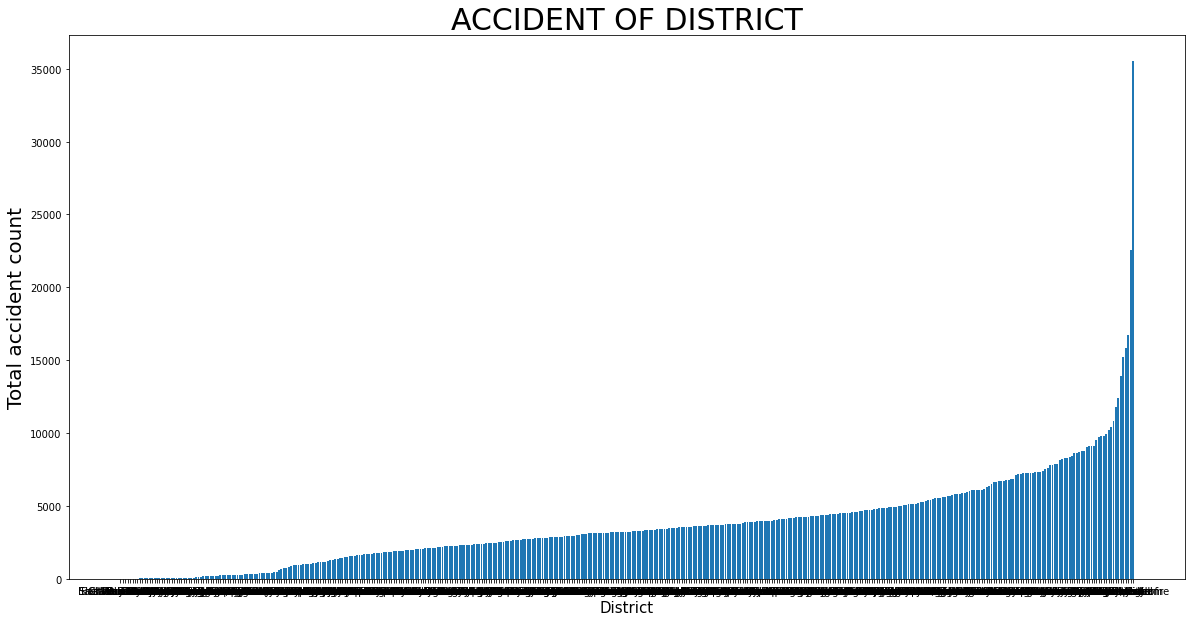

In [ ]:
#Visualize số tai nạn của từng District ở Anh từ năm 2005 đến năm 2015
x_District = list(joinDistrict['District'])
y_Total_Accident = list(joinDistrict['total_accident'])
fig = plt.figure(figsize = (20, 10));
plt.bar(x_District, y_Total_Accident);
plt.xlabel("District", fontsize = 15)
plt.ylabel("Total accident count", fontsize = 20)
plt.title("ACCIDENT OF DISTRICT", fontsize = 30)
plt.show();


**KẾT LUẬN**

Thành phố Birmingham của Anh là nơi xảy ra tai nạn nhiều nhất

# **2. TẦN SUẤT TAI NẠN GIAO THÔNG THEO ĐIỀU KIỆN ÁNH SÁNG**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


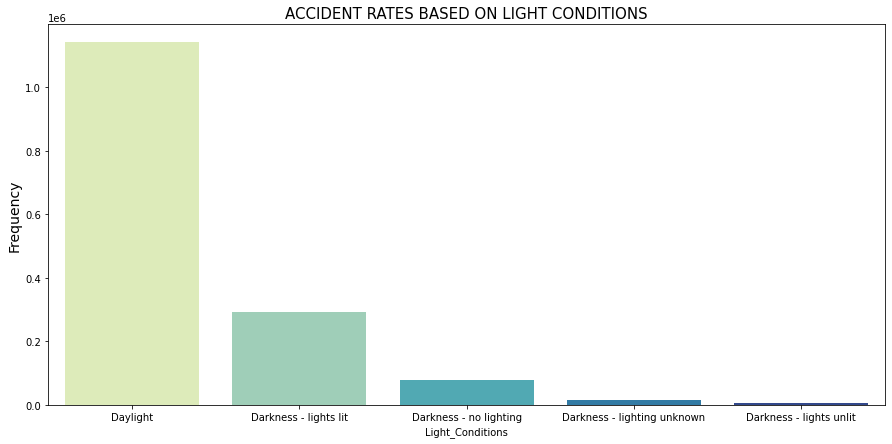

In [ ]:
plt.figure(figsize = (15,7))
ax = sns.countplot('Light_Conditions', data=Accidents, order = Accidents["Light_Conditions"].value_counts().index, palette = "YlGnBu") 
ax.set_xticklabels(['Daylight','Darkness - lights lit', 'Darkness - no lighting', 'Darkness - lighting unknown', 'Darkness - lights unlit'])
plt.title('ACCIDENT RATES BASED ON LIGHT CONDITIONS', fontsize = 15)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

**KẾT LUẬN**

Tai nạn xảy ra ban ngày tần suất xảy ra cao nhất. Lý do ban ngày mọi người chủ quan hơn vì có ánh sáng đầy đủ, chạy ẩu, không để ý. Trong khi ban đêm sẽ lái chậm và cẩn thận quan sát hơn.

# **3. THỐNG KÊ TAI NẠN THỜI GIAN TRONG 1 NGÀY & CÁC NGÀY TRONG 1 TUẦN**

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

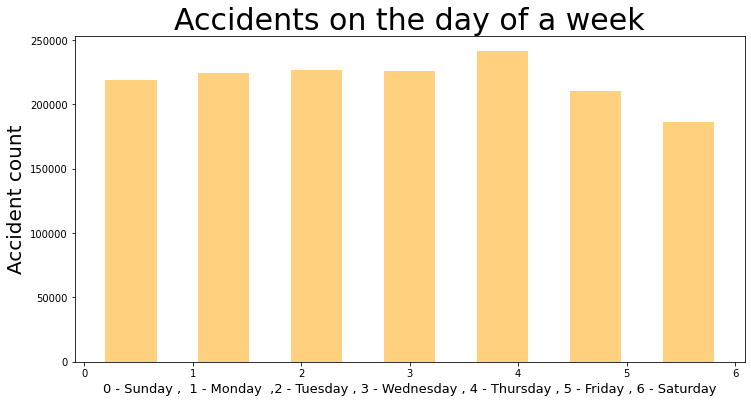

In [ ]:
plt.figure(figsize=(12,6))
Accidents.Date_time.dt.dayofweek.hist(bins = 7, rwidth = 0.55, alpha = 0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize = 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

**KẾT LUẬN**

Thứ năm có số vụ tai nạn cao nhất trong tập dữ liệu (2005-2015). Số vụ tai nạn có thể phụ thuộc vào lưu lượng giao thông vào ngày cụ thể.

Text(0, 0.5, 'Accident count')

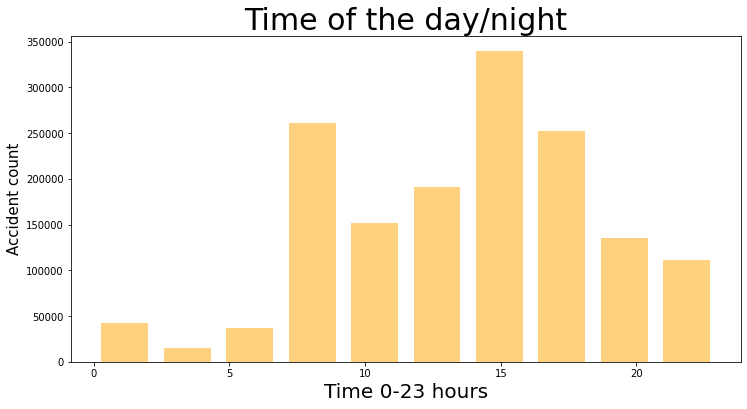

In [ ]:
plt.figure(figsize=(12,6))
Accidents.Date_time.dt.hour.hist(rwidth = 0.75, alpha = 0.50, color = 'orange')
plt.title('Time of the day/night',fontsize = 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

**KẾT LUẬN**

Các vụ tai nạn xảy ra vào khoảng sau buổi trưa. Thời điểm này trong ngày có nhiều phương tiện di chuyển nhất, như đi làm về

# **4. THỐNG KÊ TAI NẠN TRÊN LOẠI ĐƯỜNG**


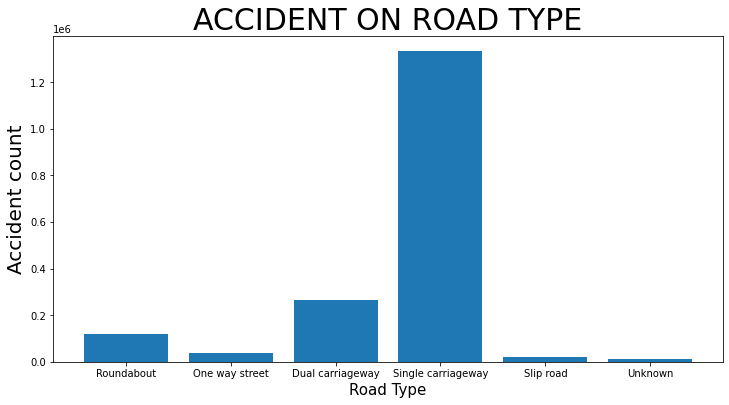

In [ ]:
dataset_road_type = df.groupby(["Road_Type"])["Road_Type"].agg(["count"]);
roadType = pd.read_csv('contextCSVs/Road_Type.csv');
x = list(roadType['label']);
x.pop(len(x)-1);
x.pop(len(x)-1);
y = list(dataset_road_type['count']);

fig = plt.figure(figsize = (12, 6));
plt.bar(x, y);
plt.xlabel("Road Type", fontsize = 15)
plt.ylabel("Accident count", fontsize = 20)
plt.title("ACCIDENT ON ROAD TYPE", fontsize = 30)
plt.show();


- Roundabout: đường vòng, bùng binh
- One way street: đường một chiều
- Dual carriageway: đường có dải phân cách giữa 2 làn xe
- Single carriageway: đường không có dải phân cách giữa 2 làn xe
- Slip road: đường giao lộ ra khỏi cao tốc

**KẾT LUẬN**

Dựa vào biểu đồ ta thấy được tác động của loại đường với tai nạn giao thông. Nổi trội là loại đường Single carriageway cao hơn gần gấp 3 lần so với các loại đường còn lại

# **5. THỐNG KÊ TAI NẠN TRÊN TỐC ĐỘ GIỚI HẠN**



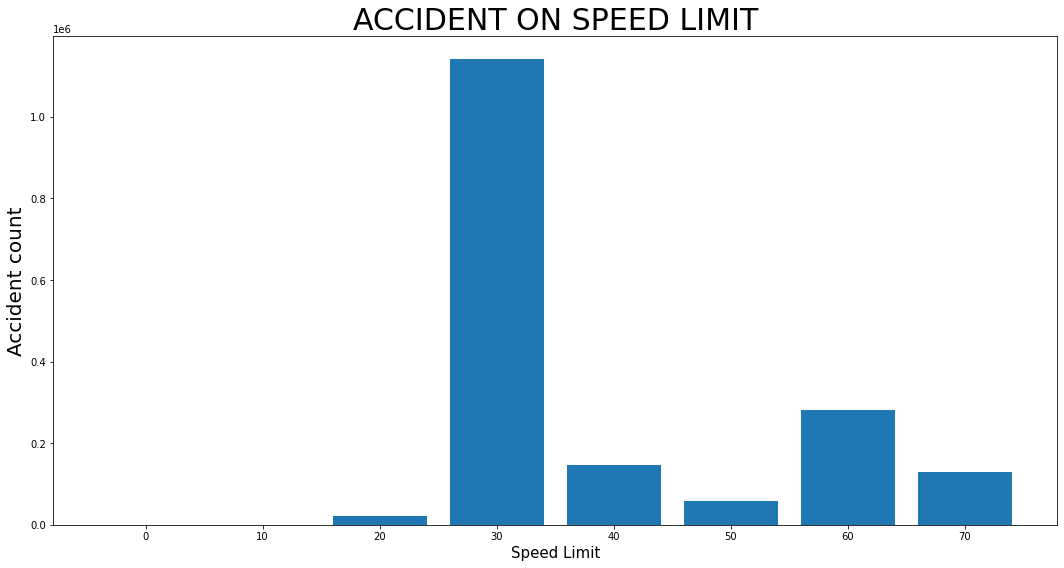

In [ ]:

dataset_speed_limit = df.groupby(["Speed_limit"])["Speed_limit"].agg(["count"]);
x_speed_limit = list(dataset_speed_limit.reset_index()['Speed_limit']);
y_speed_limit = list(dataset_speed_limit['count']);

fig = plt.figure(figsize = (18, 9));
plt.bar(x_speed_limit, y_speed_limit,width=8);
plt.xlabel("Speed Limit", fontsize = 15)
plt.ylabel("Accident count", fontsize = 20)
plt.title("ACCIDENT ON SPEED LIMIT", fontsize = 30)
plt.show();


**KẾT LUẬN**

Biểu đồ thể hiện sự tương quan giữa tốc độ giới hạn và số vụ tai nạn, với tốc độ giới hạn 30 có số vụ tai nạn nhiều nhất

# **6. LOẠI PHƯƠNG TIỆN HAY GÂY TAI NẠN NHẤT**



In [ ]:
# Đọc dữ liệu từ tệp thông tin tai nạn và thông tin phương tiện gây ra tai nạn
vehicles0515 = pd.read_csv("Vehicles0515.csv", error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
verhiclesType = pd.read_csv('contextCSVs/Vehicle_Type.csv')
verhiclesType.rename(columns={'label':'vehicle'}, inplace=True)


In [ ]:
# Đếm tổng số lượng các vụ tai nạn theo lọai phương tiện, sắp xếp giảm dần theo tổng số lượng số vụ tai nạn
accidentByVehicle = vehicles0515.groupby('Vehicle_Type')['Vehicle_Type'].agg(['count']).reset_index()
accidentByVehicle.rename(columns={'count':'total_accident'}, inplace=True)
accidentByVehicleSumarry = accidentByVehicle.set_index('Vehicle_Type').join(verhiclesType.set_index('code')).sort_values(by='total_accident', ascending=False).reset_index()
accidentByVehicleSumarry[['total_accident', 'vehicle']]

,total_accident,vehicle
0,2205201,Car
1,184083,Pedal cycle
2,138182,Van / Goods 3.5 tonnes mgw or under
3,86904,Motorcycle over 500cc
4,76888,Bus or coach (17 or more pass seats)
5,70152,Motorcycle 125cc and under
6,62962,Goods 7.5 tonnes mgw and over
7,52409,Taxi/Private hire car
8,37224,Motorcycle 50cc and under
9,25686,Motorcycle over 125cc and up to 500cc


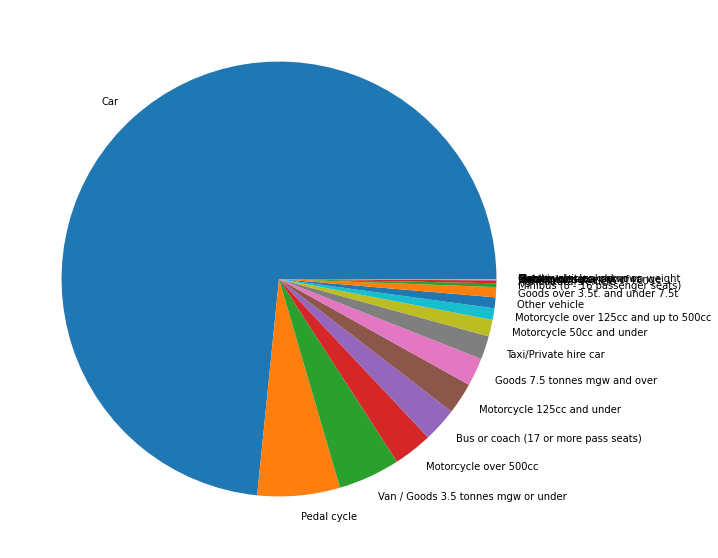

In [ ]:
# Trực quan hóa dữ liệu có được bằng biểu đồ tròn

vehicle = list(accidentByVehicleSumarry['vehicle'])
total_accident = list(accidentByVehicleSumarry['total_accident'])
fig = plt.figure(figsize = (40, 10));
plt.pie(total_accident, labels = vehicle)
# plt.legend()
plt.show()

**Kết luận:**

 Loại phương tiện hay xảy ra tai nạn giao thông nhất là xe hơi

# **7. DỰ ĐOÁN VÀ ĐÁNH GIÁ**

Chúng ta sẽ khảo sát, tìm kiếm nguyên nhân gây tai nạn rõ nhất, từ đó đưa ra hướng khắc phục

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
#data ban đầu
df = Accidents
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Date_time
Accident_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200501BS00003,-0.206458,51.525301,1,3,2,1,5,12,E09000020,5,0,6,30,0,0,0,0,4,1,1,0,0,1,1,1.0,11.0,0.0,17.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0,2005-06-01 00:15:00
200501BS00003,-0.206458,51.525301,1,3,2,1,5,12,E09000020,5,0,6,30,0,0,0,0,4,1,1,0,0,1,1,2.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0,2005-06-01 00:15:00
200501BS00004,-0.173862,51.482442,1,3,1,1,6,12,E09000020,3,3220,6,30,0,0,0,0,1,1,1,0,0,1,1,1.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0,2005-07-01 10:35:00
200501BS00006,-0.203238,51.515540,1,3,2,1,3,12,E09000020,6,0,6,30,0,0,0,0,1,2,2,6,0,1,1,1.0,9.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,1.0,51.0,8.0,2976.0,1.0,1.0,4.0,1.0,2005-11-01 12:40:00
200501BS00006,-0.203238,51.515540,1,3,2,1,3,12,E09000020,6,0,6,30,0,0,0,0,1,2,2,6,0,1,1,2.0,3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,2.0,30.0,6.0,124.0,1.0,2.0,1.0,1.0,2005-11-01 12:40:00


Ta sẽ tiến hành đánh giá xem điều nào khiến cho các vụ tai nạn xảy ra ở mức độ nghiêm trọng nhất

Đầu tiên ta cần tách dữ liệu

In [ ]:
df_x=df.drop('Accident_Severity', axis=1)

Tiếp tục loại bỏ các trường không thể hiện điều kiện xảy ra tai nạn (khu vực,...) chỉ giữ lại những trường có khả năng ảnh hưởng đến tai nạn như điều kiện ánh sáng, ...

In [ ]:
df_x = df_x[['Did_Police_Officer_Attend_Scene_of_Accident', 'Age_of_Driver', 'Vehicle_Type', 'Age_of_Vehicle', 'Engine_Capacity_(CC)', 'Day_of_Week', 'Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions', 'Sex_of_Driver', 'Speed_limit']]
df_x.head()

,Did_Police_Officer_Attend_Scene_of_Accident,Age_of_Driver,Vehicle_Type,Age_of_Vehicle,Engine_Capacity_(CC),Day_of_Week,Weather_Conditions,Road_Surface_Conditions,Light_Conditions,Sex_of_Driver,Speed_limit
Accident_Index,,,,,,,,,,,
200501BS00003,1,35.0,11.0,5.0,8300.0,5,1,1,4,1.0,30
200501BS00003,1,62.0,9.0,6.0,1762.0,5,1,1,4,1.0,30
200501BS00004,1,49.0,9.0,4.0,1769.0,6,1,1,1,2.0,30
200501BS00006,1,51.0,9.0,1.0,2976.0,3,2,2,1,1.0,30
200501BS00006,1,30.0,3.0,2.0,124.0,3,2,2,1,2.0,30


In [ ]:
df_x['Age_of_Driver'] = np.log(df_x['Age_of_Driver'])
df_x['Age_of_Vehicle'] = np.log(df_x['Age_of_Vehicle'])

Sau đó tiến hành chia dữ liệu vào các tập train và test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_x.values, df['Accident_Severity'].values, random_state=99)

Chúng ta sẽ sử dụng  model để predict

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([3, 3, 3, ..., 3, 1, 2])

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,All
Actual,,,,
1,229,1157,3747,5133
2,1235,8931,37471,47637
3,4978,46471,279479,330928
All,6442,56559,320697,383698


In [ ]:
acc_decision_tree1 = round(model.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)

Accuracy 75.23
              precision    recall  f1-score   support

           1   0.035548  0.044613  0.039568      5133
           2   0.157906  0.187480  0.171427     47637
           3   0.871474  0.844531  0.857791    330928

    accuracy                       0.752256    383698
   macro avg   0.354976  0.358875  0.356262    383698
weighted avg   0.771700  0.752256  0.761631    383698



Chúng ta tiếp tục dùng thư viện để xem xét điều kiện nào là quan trọng nhất ảnh hưởng tới vụ tai nạn

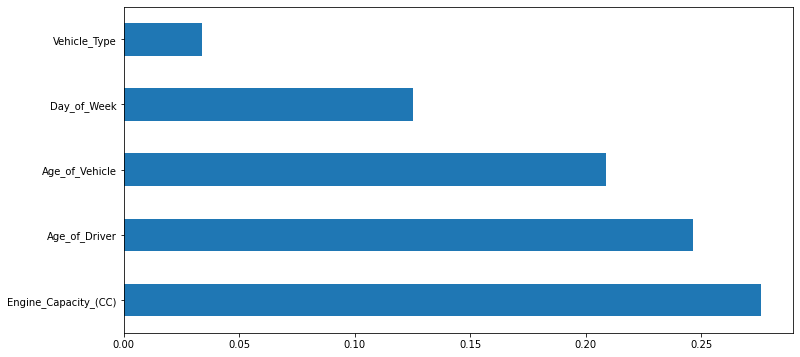

In [ ]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(model.feature_importances_, index=df_x.columns)
feat_importances.nlargest(5).plot(kind='barh')

**KẾT LUẬN**

Có thể thấy điều kiện ảnh hưởng đến các vụ tai nạn nhất là dung tích của động cơ và tuổi của tài xế, ngoài ra tuổi của phương tiện cũng ảnh hưởng lớn đến tính chất nghiêm trọng của vụ tai nạn.

In [ ]:
age1 = df['Age_of_Vehicle'].max()
age1

108.0

In [ ]:
age = pd.DataFrame(df['Age_of_Vehicle'])
bins = [-1,0,3,5,15,111]
labels = ['unknown','New','Nearly new','Avg','Old']
age['AgeGroup'] = pd.cut(age['Age_of_Vehicle'], bins=bins, labels=labels, right=False)
age.groupby('AgeGroup').count()

,Age_of_Vehicle
AgeGroup,
unknown,0
New,241159
Nearly new,236539
Avg,973731
Old,83363


**KẾT LUẬN**

Với tuổi tác của phương tiện, ta có thể thấy các phương tiện từ trung bình đến cũ chiếm đa số, khá nhiều trong các vụ tai nạn nghiêm trọng, do đó có thể đề xuất biện pháp kiểm tra tuổi thọ xe, cấp giấy phép với xe có tuổi thọ trung bình và lớn để tránh trường hợp xe hư hỏng